In [8]:
import os, random, fnmatch
import deepdish as dd
import shutil
import matplotlib.pyplot as plt
from sklearn.mixture import GMM
from sklearn.decomposition import PCA
import numpy as np

In [16]:
DIR = '/home/jvidyala/data/'
DATA_DIR = DIR + 'original_data/'
MFCC_DIR = DIR + 'mfcc_test/'
os.chdir(DIR)
os.mkdir('mfcc_test')


Move 100 .h5 files of tracks present in train_triplets.txt to mfcc_test

Create directory with 10 random .h5 files

In [17]:
track_ids = dd.io.load('track_ids.h5')
track_ids = [track[0] for track in track_ids]

for track_id in track_ids:
    fp = track_id[2]+'/'+track_id[3]+'/'+track_id[4]+'/'+track_id+'.h5'
    fp = (os.path.join(DATA_DIR,fp))
    shutil.copy(fp,DIR+'/mfcc_test')
    
while len(os.listdir(MFCC_DIR+'test/')) < 10:
    x=random.choice(os.listdir(MFCC_DIR)) 
    if x not in os.listdir(MFCC_DIR+'test/'):
        shutil.copy(MFCC_DIR+x,MFCC_DIR+'test/')

In [86]:
test_file1 = dd.io.load(MFCC_DIR+'TRIXVKW128F422BEBB.h5')
mfcc_features1 = test_file1['analysis']['segments_timbre']
test_file2 = dd.io.load(MFCC_DIR+'test/TRAYMDE128F4289C09.h5')
mfcc_features2 = test_file2['analysis']['segments_timbre']
test_file3 = dd.io.load(MFCC_DIR+'test/TRFEVXG128F148B0FB.h5')
mfcc_features3 = test_file3['analysis']['segments_timbre']
print(mfcc_features1.shape,mfcc_features2.shape,mfcc_features3.shape)
X = (np.vstack((mfcc_features1,mfcc_features2,mfcc_features3)))
print(X)
print(X.shape)

((140, 12), (589, 12), (583, 12))
[[   0.     171.13     9.469 ...    0.973  -10.64    -7.228]
 [   3.813   87.415  -52.839 ...   18.263   -1.181    8.953]
 [  23.294 -137.797  -71.743 ...   46.574   39.691    2.475]
 ...
 [  32.429 -158.265  -18.906 ...   13.675   15.382  -46.399]
 [  18.483  -57.18   -93.172 ...  -58.129   17.99   -20.979]
 [   5.34    50.751  -97.328 ...   -1.399   22.976  -18.206]]
(1312, 12)


Train GMM with 3 components on MFCC data from 3 files

In [66]:
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)
# print(probs[:140].round(3))
print(labels)

[1 2 1 ... 1 1 1]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

Perform PCA to reduce dimensionality to 2 for viewing

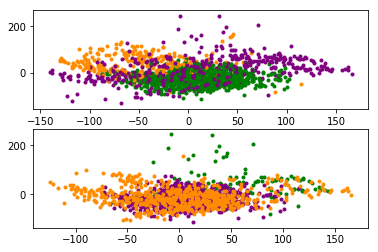

In [68]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
colors = ['green','purple', 'darkorange']
plt.figure(1)
plt.subplot(211)

for i,label in enumerate(labels):
    plt.scatter(X_r[i,0],X_r[i,1],label=labels[i],color=colors[labels[i]],marker='.')

plt.subplot(212)
true_labels = [0]*140+[1]*589+[2]*583   
for i,label in enumerate(true_labels):
    plt.scatter(X_r[i,0],X_r[i,1],label=true_labels[i],color=colors[true_labels[i]],marker='.')


Using average of MFCCs for each song instead of each MFCC coefficient vector

In [11]:
os.chdir(MFCC_DIR)

In [12]:

mfcc_coeffs = {filename: [] for idx,filename in enumerate(fnmatch.filter(os.listdir(MFCC_DIR),'*.h5'))}
feature_vector = {filename: [] for idx,filename in enumerate(fnmatch.filter(os.listdir(MFCC_DIR),'*.h5'))}
count = 0
for file in fnmatch.filter(os.listdir(MFCC_DIR),'*.h5'):
    try:
        temp_load = dd.io.load(file)['analysis']['segments_timbre']
        mfcc_coeffs[file] = temp_load
        temp = []
        for j in range(12):
            feature_set = [(mfcc_coeffs[file][j]) for i in range(mfcc_coeffs[file].shape[0])]
            avg_feature = np.mean(np.array(feature_set))
            temp.append(avg_feature)
        feature_vector[file]=temp
    except IOError as e:
        count+=1
print(feature_vector)
print(count)

{'TRWKIZV128F931BB09.h5': [11.301, 43.037416666666665, 50.310916666666664, 42.24816666666666, 41.8215, 43.23166666666666, 19.255999999999997, 42.062666666666665, 34.66458333333333, 31.991333333333337, 25.242166666666666, 40.42908333333333], 'TRIOEOU128F92D061E.h5': [11.301, 11.073916666666667, 3.0656666666666648, 0.6105833333333347, 10.27375, 11.2335, 6.759500000000003, 8.39725, 8.299083333333334, 4.468583333333332, 0.9585, -1.4357500000000007], 'TRMZTFH128F428B96E.h5': [11.300999999999998, 24.195916666666662, 5.551666666666667, 17.38533333333333, 10.474, 0.37708333333333266, 10.067166666666667, 6.406333333333332, 11.571250000000003, 7.720999999999998, 4.573083333333335, 12.565499999999998], 'TRNWCDR128F9354F0E.h5': [52.34758333333333, 13.787083333333333, 18.65716666666667, 9.90975, 2.84975, 2.8698333333333355, 12.057666666666668, 7.653833333333333, 20.66391666666667, 9.170833333333334, 7.245583333333334, 9.163583333333333], 'TRLBUEP128F934AAF8.h5': [16.85433333333333, 2.37475000000000

Plotting after PCA reduction of avg values

(100, 12)


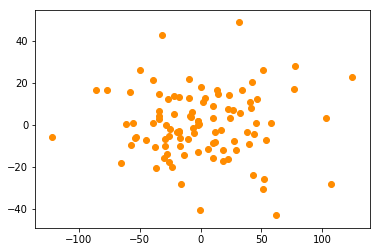

In [69]:
W = []
for _,val in feature_vector.items():
    W.append(list(val))

pca = PCA(n_components=2)
X_r = pca.fit(W).transform(W)
plt.figure(1)

for i in range(len(W)):
    plt.scatter(X_r[i,0],X_r[i,1],color='darkorange')

print(len(W),len(W[0]))

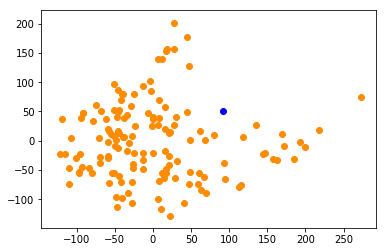

In [113]:
mfcc_feat_test = mfcc_features1
T1 = (np.vstack((mfcc_feat_test,feature_vector['TRIXVKW128F422BEBB.h5'])))

pca = PCA(n_components=2)
T1_r = pca.fit(T1).transform(T1)
plt.figure(1)
xr,yr = T1_r[len(T1)-1,0],T1_r[len(T1)-1,1]

for i in range(len(T1)):
    if i==len(T1)-1:
        plt.scatter(T1_r[i,0],T1_r[i,1],color='blue')
    else:
        plt.scatter(T1_r[i,0],T1_r[i,1],color='darkorange')
    
